# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [145]:
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

Populating the interactive namespace from numpy and matplotlib


## Постоянные

In [146]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [147]:
def get_2_shaft_nominal_parameters_note(df):
    m = df.max()
    eta = m.get('efficiency')
    mass_rate = m.get('mass_rate')
    pi = m.get('pi')
    power = m.get('specific_power') / 1e6
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

def get_3_shaft_nominal_parameters_note(df):
    return get_2_shaft_nominal_parameters_note(df)

### Функции работы с графиками

In [148]:
# функция выводит график зависимости относительного КПД, относительного расхода и относительной мощности
# от степени повышения давления в компрессоре на номинальном режиме
def plot_nom_characteristic(df):
    norm_df = df / df.max()
    norm_df.pi = df.pi
    plt.title(
        '$Приведенная \ характеристика \ установки \ на \ номинальном \ режиме\ (\overline{f} = f / f_{max})$', 
        fontsize=24
    )
    plt.plot(norm_df.pi, norm_df.mass_rate)
    plt.plot(norm_df.pi, norm_df.efficiency)
    plt.plot(norm_df.pi, norm_df.specific_power)
    plt.xlabel('$\pi$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.ylim([0.83, 1.005])
    plt.legend(
        ['$\overline{G}$', '$\overline{\eta}$', '$\overline{L_e}$'], fontsize=20, loc='lower right',
    )

# функция выводит зависимость относительного КПД и относительного расхода установки в зависимости от относительной 
# мощности установки
def plot_common_characteristics(df):
    norm_df = df / df.max()
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$', fontsize=24)
    plt.plot(norm_df.power, norm_df.mass_rate)
    plt.plot(norm_df.power, norm_df.eta)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim(0.3, 1.05)
    plt.ylim(0.5, 1.01)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right', fontsize=20)
    
# функция строит сравнение некоторого параметра по относительной мощности
def plot_comparison(dfs, y_selector):
    for df in dfs:
        plt.plot(df.power / df.power.max(), df[y_selector])
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim(0.3, 1.05)
    plt.grid()

## Общее

### Ниже представлено сравнение характеристик установок на режимах частичной мощности. Условия сравнения следующие: 
1. Степень повышения давления компрессоров выбиралась из условия максимального КПД на номинальном режиме работы.
2. Температура основной камеры сгорания: 1450 К.
3. Номинальная мощность 16 МВт
4. Для трехвальных схем характеристика на номинальном режиме строится при одинаковых степенях повышения давления в обоих компрессорах

## Двухвальная установка без регенератора

### Загрузка данных

In [149]:
d2n = pd.read_json(data_root + '2n.json').sort_values('t')
d2ns = pd.read_json(data_root + '2n_simple.json')

### Выведем параметры установки в точке максимального КПД

In [150]:
get_2_shaft_nominal_parameters_note(
    d2ns[d2ns.efficiency == d2ns.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [151]:
get_2_shaft_nominal_parameters_note(
    d2ns[d2ns.specific_power == d2ns.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

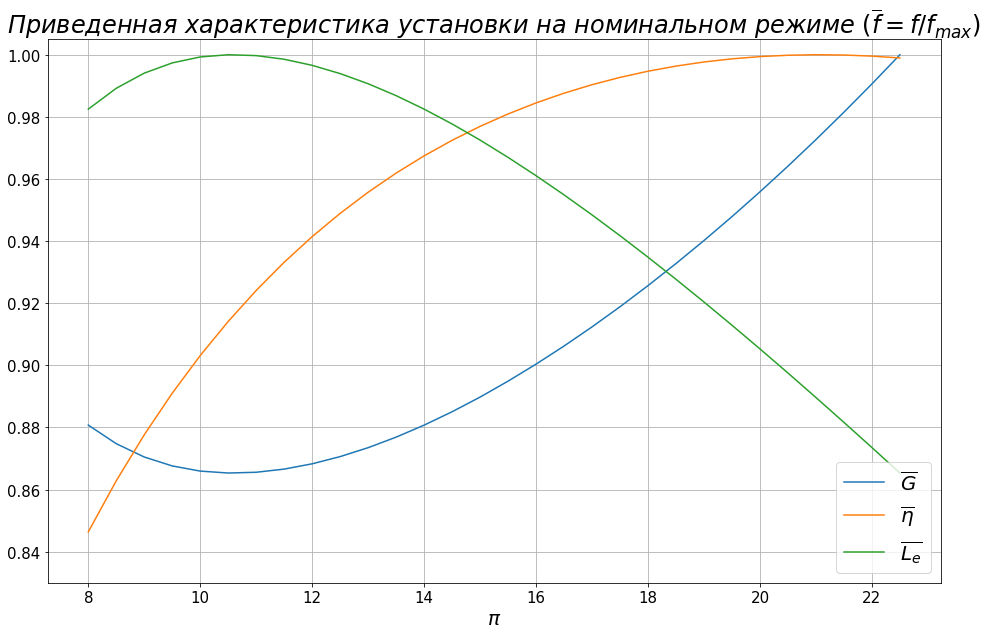

In [152]:
plot_nom_characteristic(d2ns)
plt.show()

### Построим характеристику установки на режимах частичной мощности

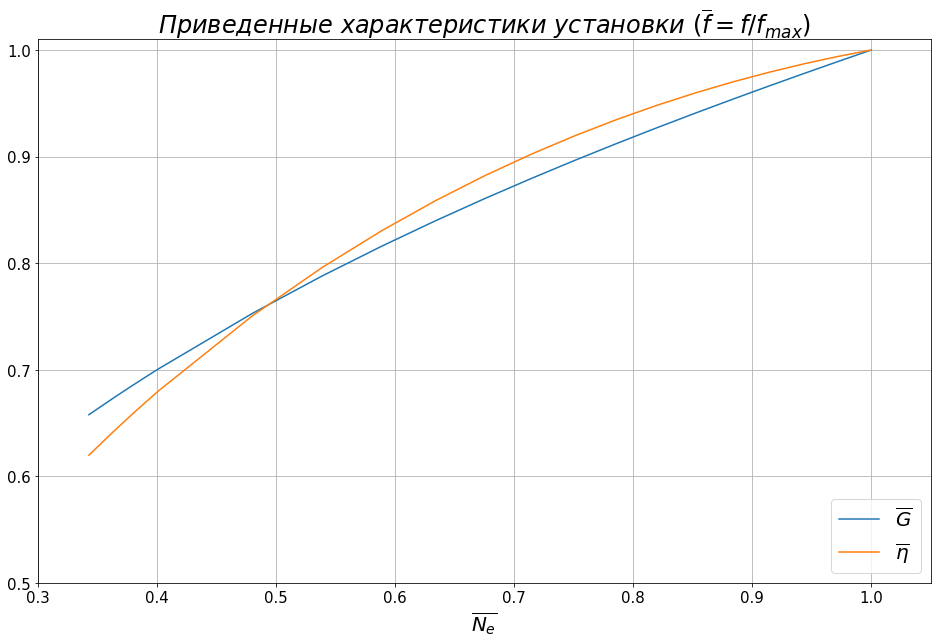

In [153]:
plot_common_characteristics(d2n)
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [154]:
d2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
d2nrs = pd.read_json(data_root + '2nr_simple.json')

### Выведем параметры установки в точке максимального КПД

In [155]:
get_2_shaft_nominal_parameters_note(
    d2nrs[d2nrs.efficiency == d2nrs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [156]:
get_2_shaft_nominal_parameters_note(
    d2nrs[d2nrs.specific_power == d2nrs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

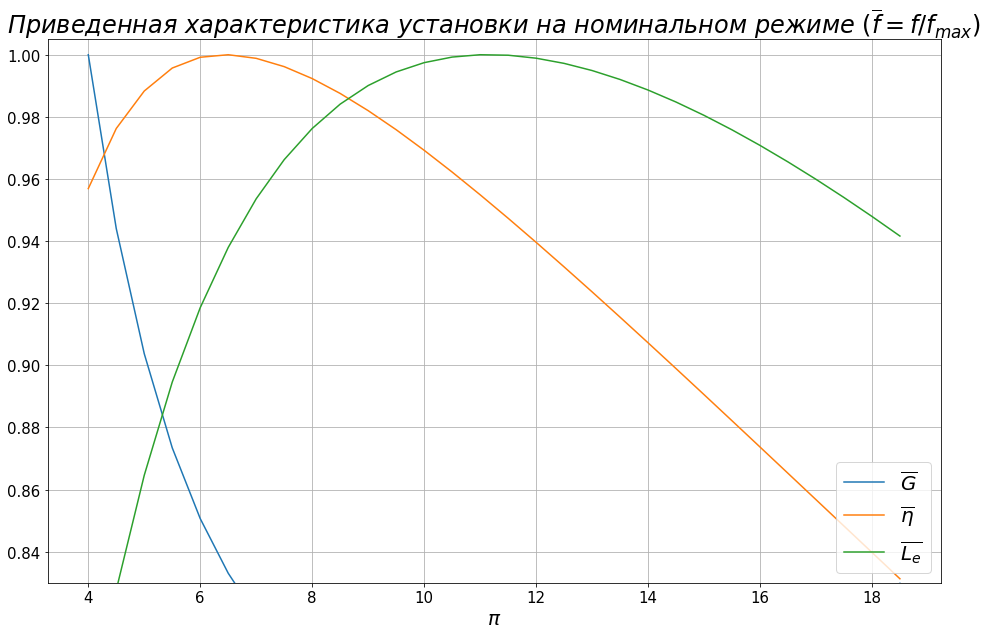

In [157]:
plot_nom_characteristic(d2nrs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

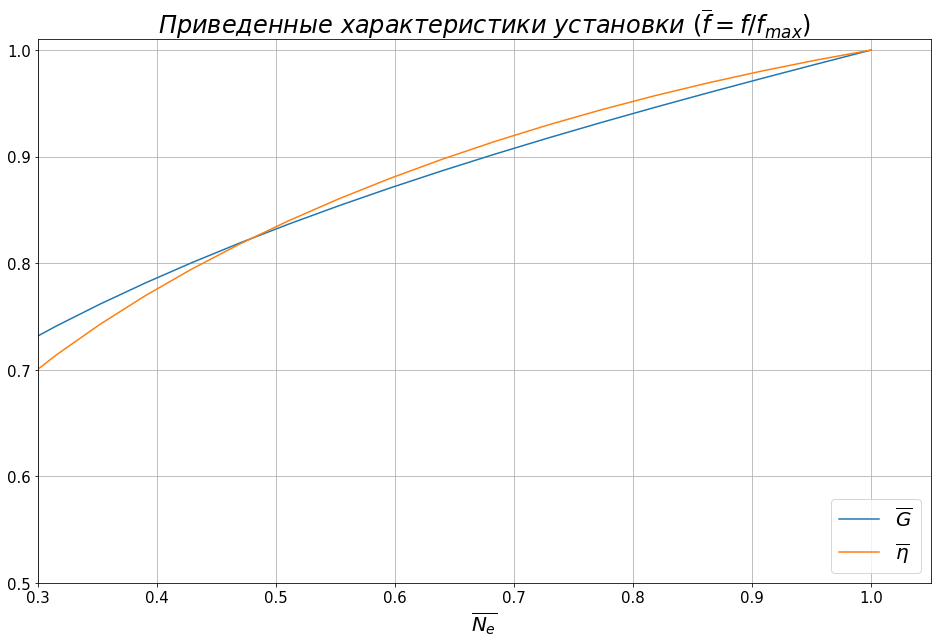

In [158]:
plot_common_characteristics(d2nr)
plt.show()

## Трехвальная установка без пром. охлаждения и пром. подогрева

### Загрузка данных

In [159]:
d3n = pd.read_json(data_root + '3n.json').sort_values('t')
d3ns = pd.read_json(data_root + '3n_simple.json')
d3ns = d3ns[d3ns.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [160]:
get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.efficiency == d3ns.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [161]:
get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.specific_power == d3ns.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

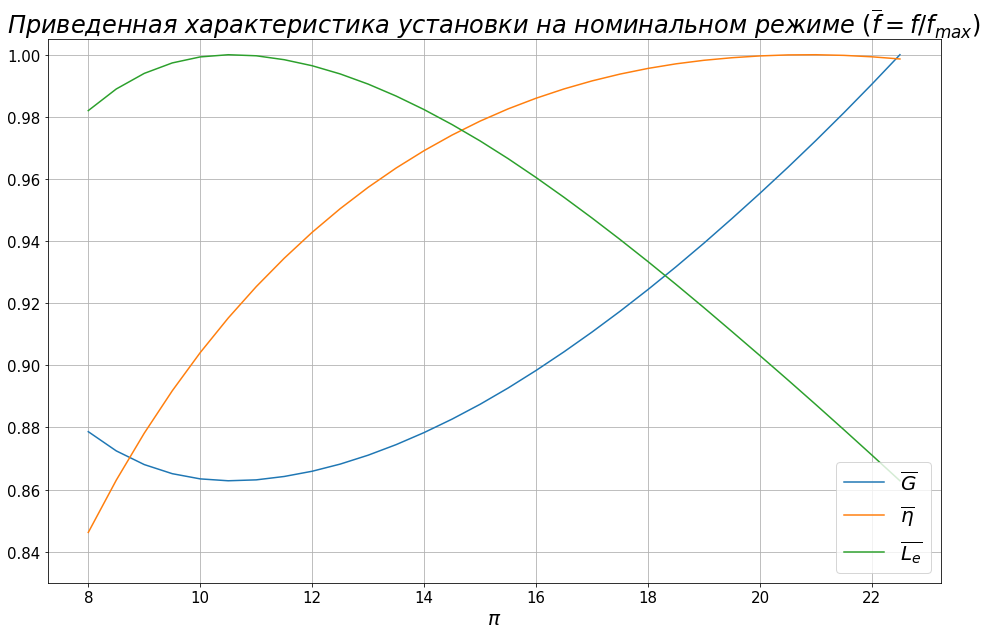

In [162]:
plot_nom_characteristic(d3ns)
plt.show()

### Построим характеристику установки на режимах частичной мощности

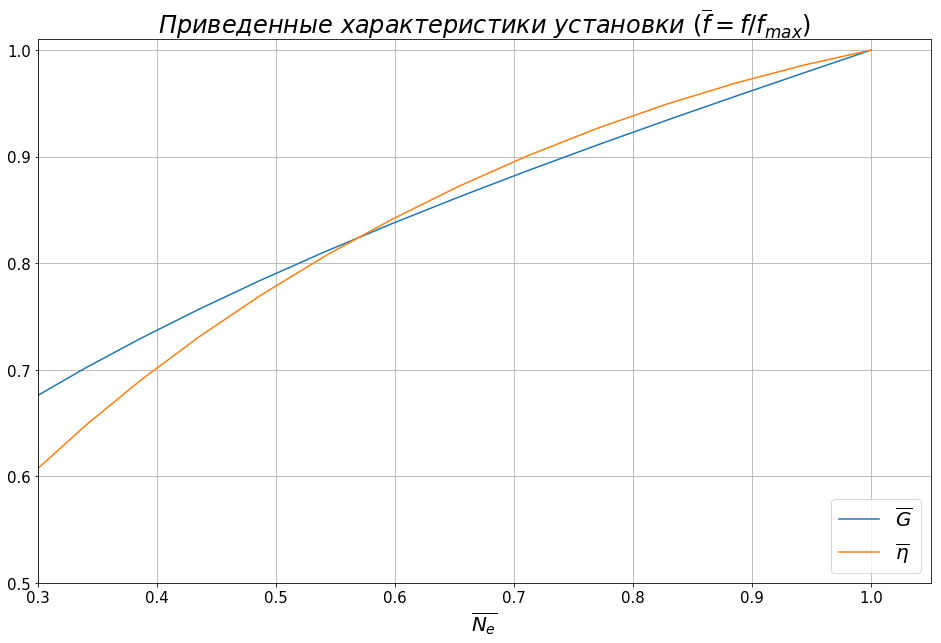

In [163]:
plot_common_characteristics(d3n)
plt.show()

## Трехвальная установка без пром. охлаждения и пром. подогрева

### Загрузка данных

In [164]:
d3n = pd.read_json(data_root + '3n.json').sort_values('t')
d3ns = pd.read_json(data_root + '3n_simple.json')
d3ns = d3ns[d3ns.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [165]:
get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.efficiency == d3ns.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [166]:
get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.specific_power == d3ns.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

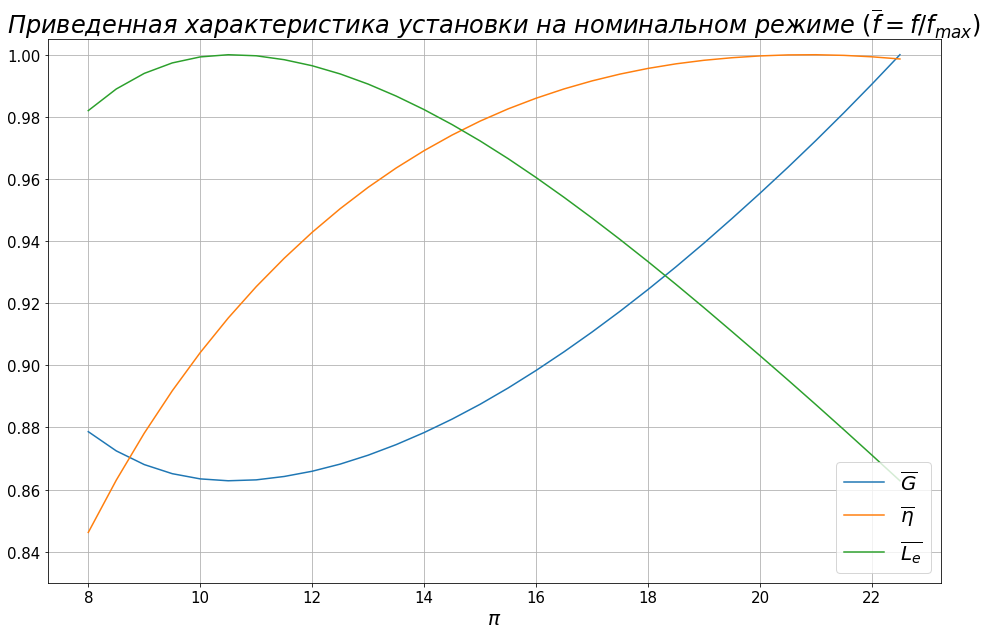

In [167]:
plot_nom_characteristic(d3ns)
plt.show()

### Построим характеристику установки на режимах частичной мощности

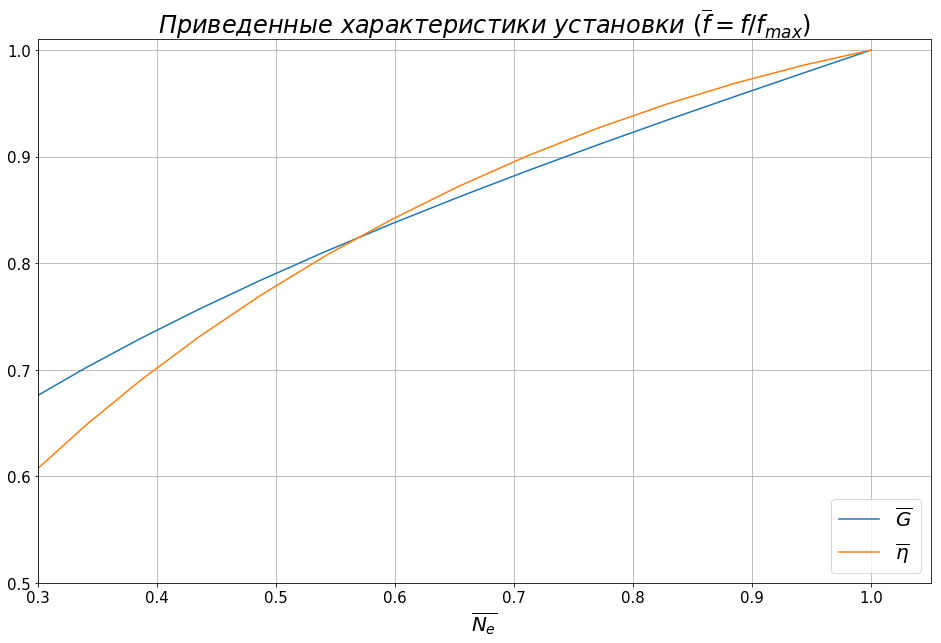

In [168]:
plot_common_characteristics(d3n)
plt.show()

## Трехвальная установка с пром. подогревом

### Загрузка данных

In [190]:
d3nb = pd.read_json(data_root + '3nb.json').sort_values('t')
d3nbs = pd.read_json(data_root + '3nb_simple.json')
d3nbs = d3nbs[d3nbs.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [191]:
get_3_shaft_nominal_parameters_note(
    d3nbs[d3nbs.efficiency == d3nbs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [192]:
get_3_shaft_nominal_parameters_note(
    d3nbs[d3nbs.specific_power == d3nbs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

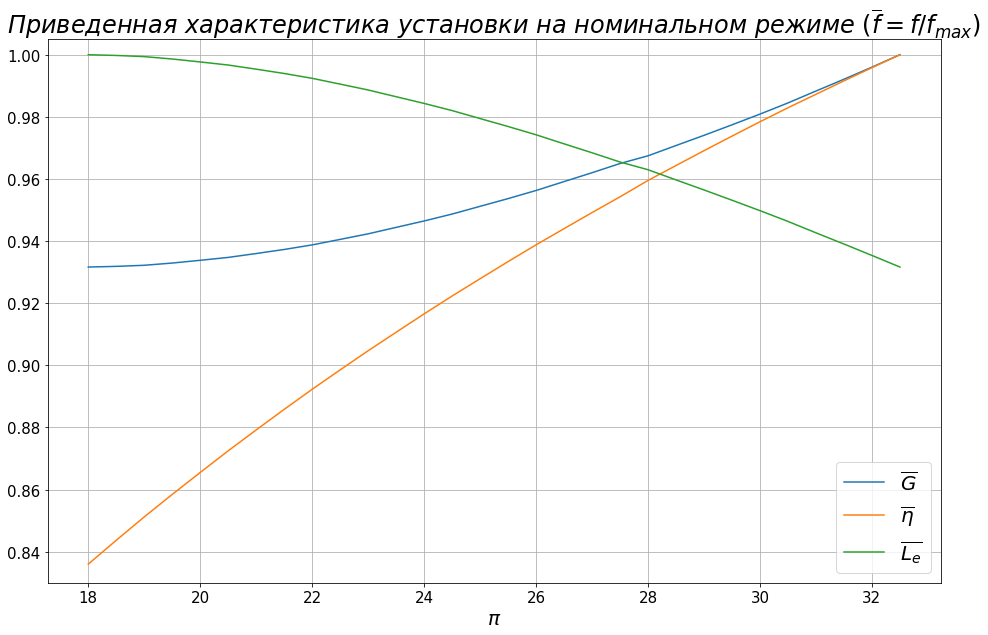

In [193]:
plot_nom_characteristic(d3nbs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

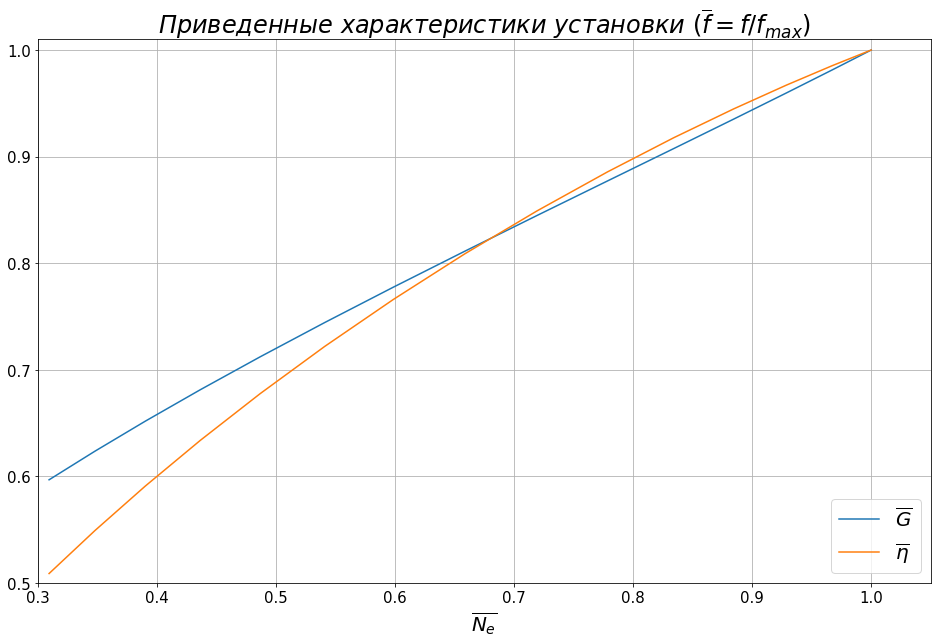

In [194]:
plot_common_characteristics(d3nb)
plt.show()

## Трехвальная установка с пром. охлаждением

### Загрузка данных

In [195]:
d3nc = pd.read_json(data_root + '3nc.json').sort_values('t')
d3ncs = pd.read_json(data_root + '3nc_simple.json')
d3ncs = d3ncs[d3ncs.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [196]:
get_3_shaft_nominal_parameters_note(
    d3ncs[d3ncs.efficiency == d3ncs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [197]:
get_3_shaft_nominal_parameters_note(
    d3ncs[d3ncs.specific_power == d3ncs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

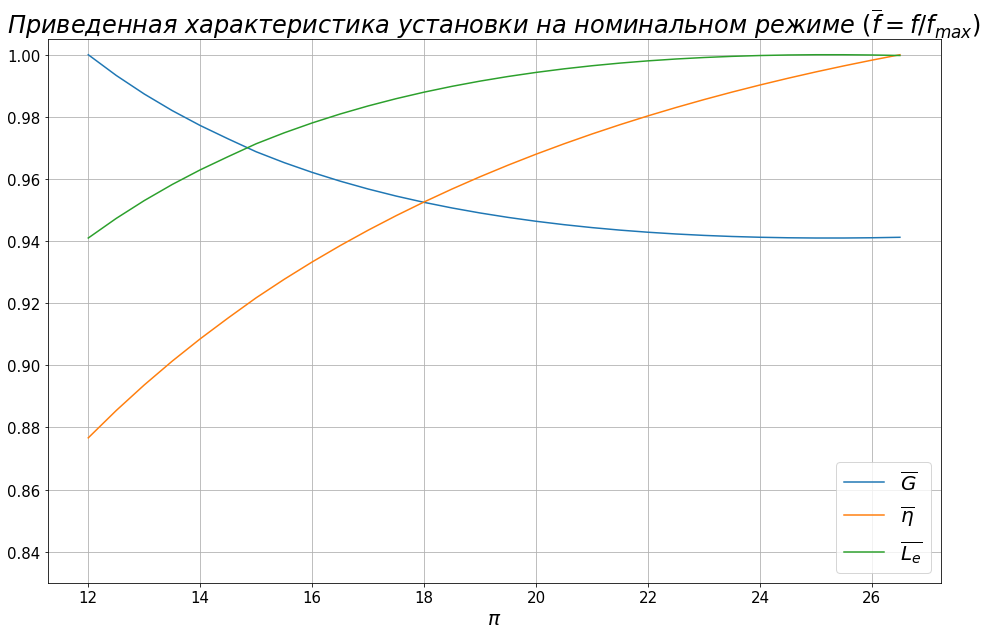

In [198]:
plot_nom_characteristic(d3ncs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

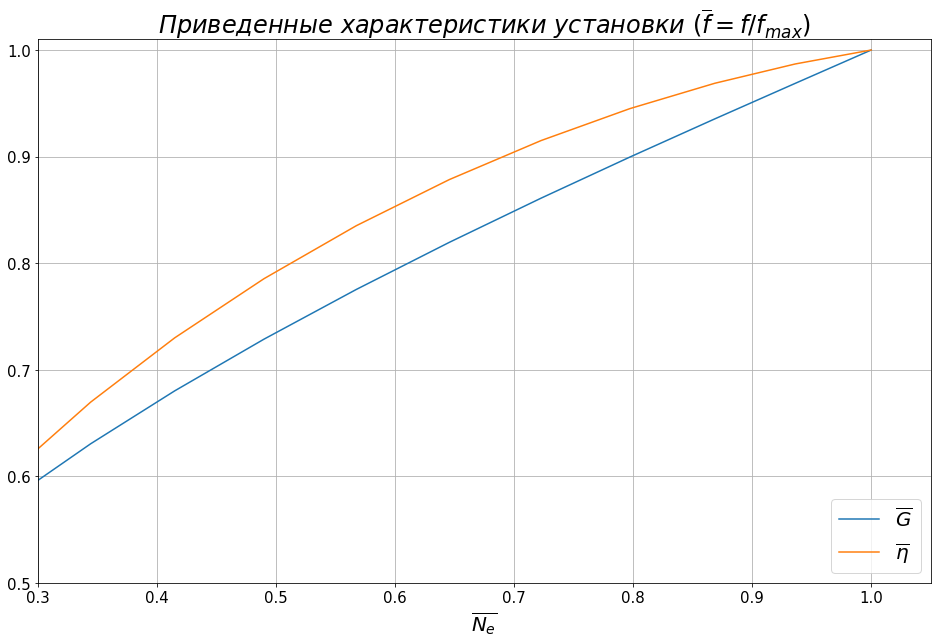

In [199]:
plot_common_characteristics(d3nc)
plt.show()

## Сравнительная характеристика всех установок на режимах частичной мощности

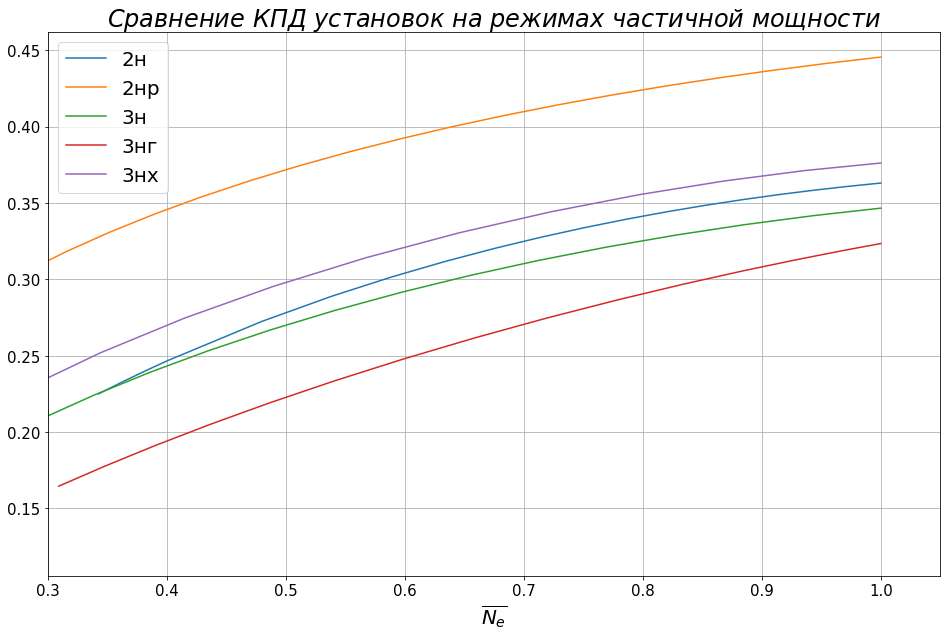

In [200]:
plot_comparison([d2n, d2nr, d3n, d3nb, d3nc], 'eta')
plt.legend(['2н', '2нр', '3н', '3нг', '3нх'], loc='best', fontsize=20)
plt.title('$Сравнение \ КПД \ установок \ на \ режимах \ частичной \ мощности$', fontsize=24)
plt.show()

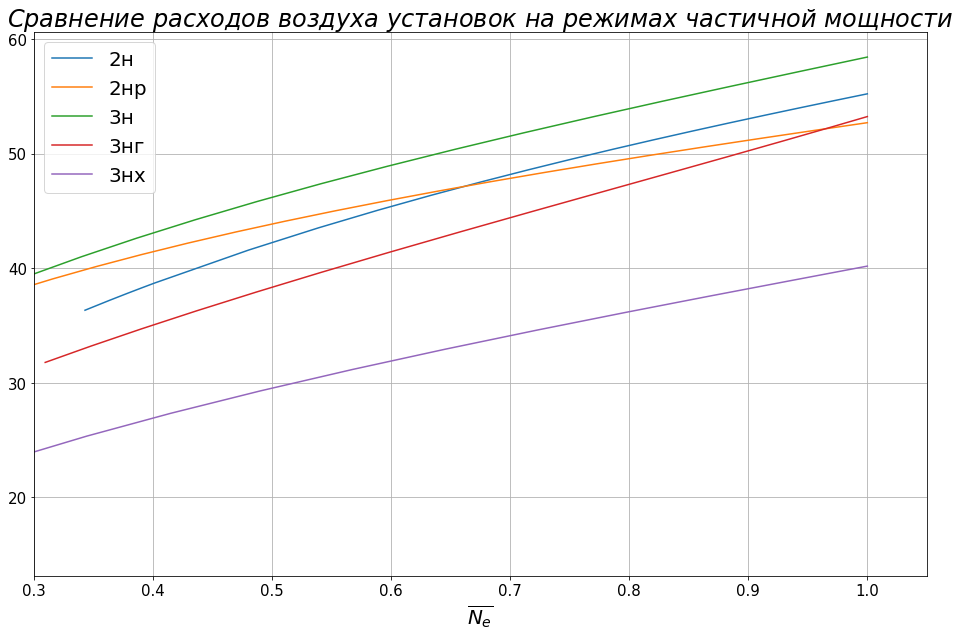

In [201]:
plot_comparison([d2n, d2nr, d3n, d3nb, d3nc], 'mass_rate')
plt.legend(['2н', '2нр', '3н', '3нг', '3нх'], loc='best', fontsize=20)
plt.title('$Сравнение \ расходов \ воздуха \ установок \ на \ режимах \ частичной \ мощности$', fontsize=24)
plt.show()